In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# Input data

In [3]:
df = pd.read_csv("/kaggle/input/titanic/train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


**Check Value Kosong (Mengidentifikasi Nilai Hilang)**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Pie Chart Missing Value**

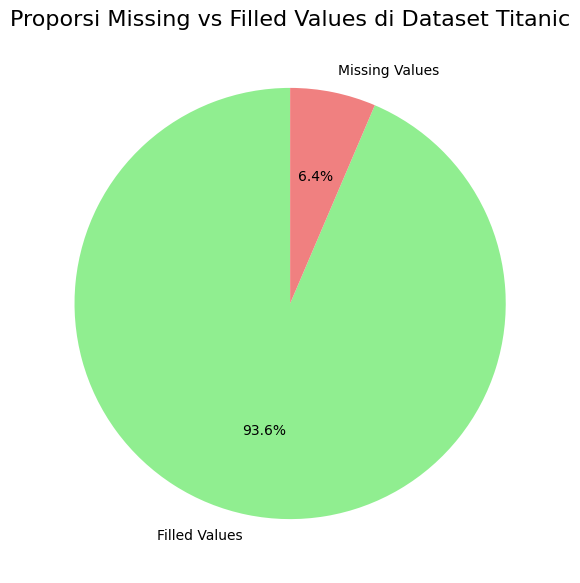

In [13]:
# Pastikan library matplotlib.pyplot sudah diimport
import matplotlib.pyplot as plt

# Menghitung total missing values dan filled values di dataset
total_values = df.size
missing_values_total = df.isnull().sum().sum()
filled_values_total = total_values - missing_values_total

# Visualisasi Pie Chart
plt.figure(figsize=(7, 7))
plt.pie([filled_values_total, missing_values_total], labels=['Filled Values', 'Missing Values'], 
        colors=['lightgreen', 'lightcoral'], autopct='%1.1f%%', startangle=90)
plt.title('Proporsi Missing vs Filled Values di Dataset Titanic', fontsize=16)
plt.show()

**EDA (Exploratory Data Analyst)**

**EDA (Exploratory Data Analyst) Memvisualisasikan data untuk mendapatkan wawasan yang lebih baik tentang pola dan hubungan antar fitur dalam dataset.**

**Import Library untuk EDA**

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

# Memuat dataset Titanic
df = pd.read_csv('/kaggle/input/titanic/train.csv')  # Ganti dengan path ke file And

**Visualisasi Distribusi Survived**

Grafik ini membantu dalam melihat perbandingan jumlah penumpang yang selamat.

Survived = 1 No Survived = 0

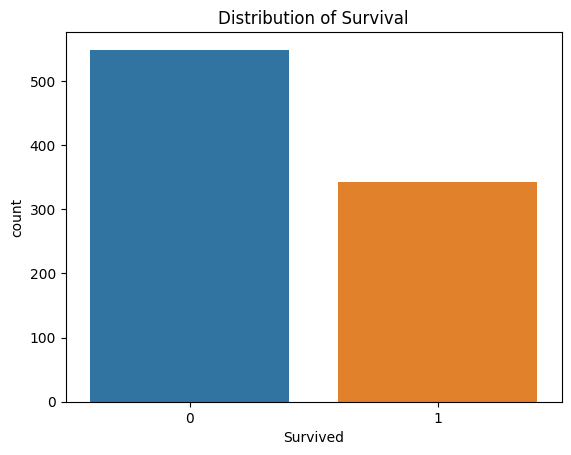

In [19]:
sns.countplot(data=df, x='Survived')
plt.title('Distribution of Survival')
plt.show()

Berdasarkan grafik di atas, dapat dilihat jika penumpang yang tidak bisa survived lebih banyak dari pada yang survived

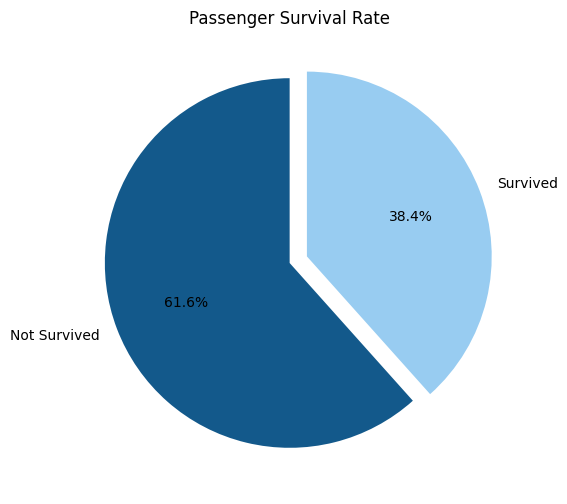

In [21]:
import matplotlib.pyplot as plt

# Menghitung jumlah penumpang yang selamat (1) dan tidak selamat (0)
survived_counts = df['Survived'].value_counts()

# Membuat pie chart dengan warna biru
plt.figure(figsize=(6,6))
plt.pie(survived_counts, labels=['Not Survived', 'Survived'], autopct='%1.1f%%', startangle=90, colors=['#13598b', '#98ccf1'], explode=[0, 0.1])
plt.title('Passenger Survival Rate')
plt.show()

**Visualisasi Pclass**

Pclass menunjukkan kelas tiket (1st, 2nd, 3rd class)

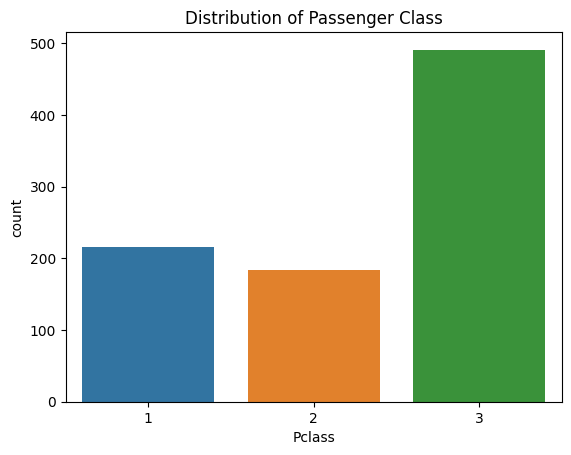

In [22]:
sns.countplot(data=df, x='Pclass')
plt.title('Distribution of Passenger Class')
plt.show()

Berdasarkan grafik di atas, penumpang paling banyak menggunakan tiket kelas 3

**Visualisasi Distribusi Sex**

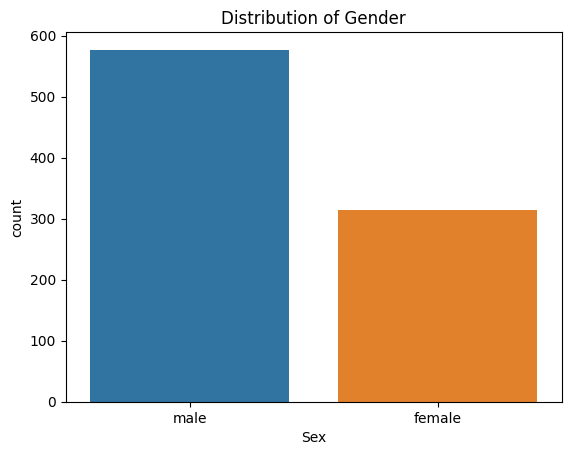

In [23]:
sns.countplot(data=df, x='Sex')
plt.title('Distribution of Gender')
plt.show()

**Visualisasi Age**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


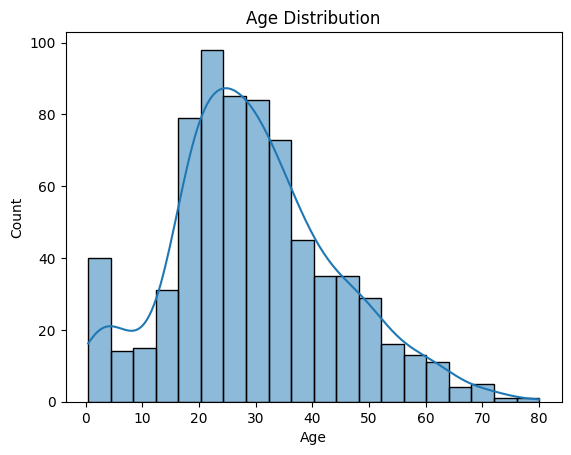

In [25]:
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')
plt.show()

**Visualisasi Fare**

Menjelaskan tarif yang dibayar penumpang

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


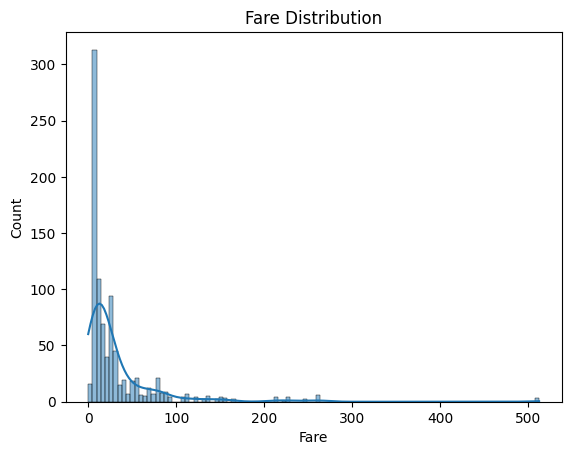

In [26]:
sns.histplot(df['Fare'], kde=True)
plt.title('Fare Distribution')
plt.show()

**Analisis Hubungan Kategori**

Analisis Hubungan Kategori/Fitur dengan kategori lainnya untuk melihat apakah berpengaruh terhadap peluang penumpang yang survived.

**Analisis Pclass dan Survived**

Grafik ini akan menunjukkan berapa banyak penumpang dari setiap kelas yang selamat dan yang tidak.

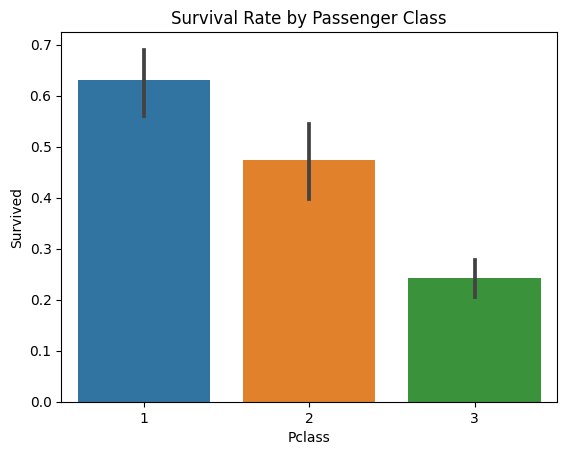

In [27]:
sns.barplot(data=df, x='Pclass', y='Survived')
plt.title('Survival Rate by Passenger Class')
plt.show()

Persentase orang yang selamat pada Pclass = 1 lebih besar dibandingkan Pclass 2 dan 3

**Analisis Sex dan Survived**

Grafik ini menunjukkan perbedaan peluang bertahan hidup antara pria dan wanita

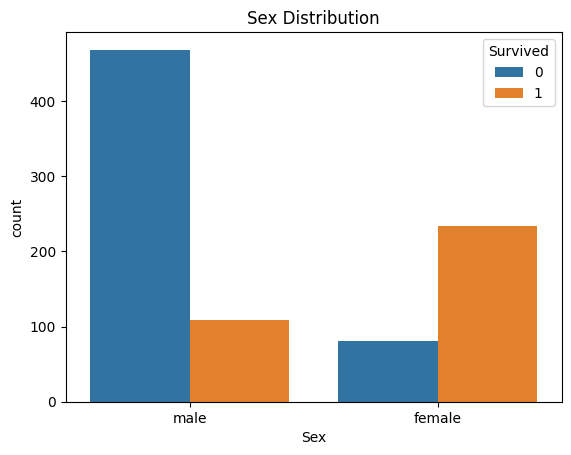

In [28]:
sns.countplot(data=df, x='Sex', hue='Survived')
plt.title('Sex Distribution')
plt.show()

Persentase orang yang selamat pada Sex = female lebih tinggi dibandingkan male.

Survived = 1 Un Survived = 0

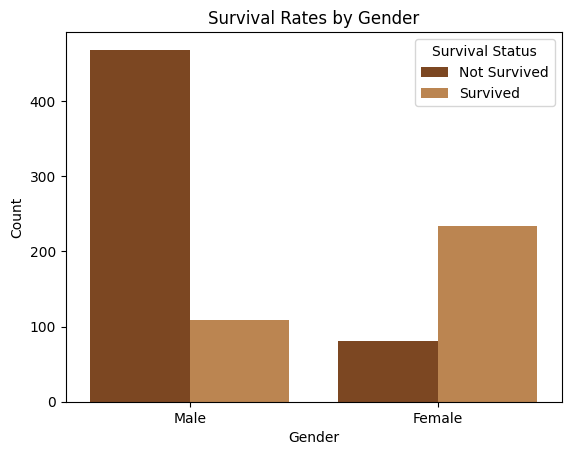

In [30]:
# Count plot for categorical features with custom colors (dark brown and light brown)
sns.countplot(data=df, x='Sex', hue='Survived', palette=['saddlebrown', 'peru'], hue_order=[0, 1])
plt.title('Survival Rates by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

# Mengubah label sumbu x menjadi Male dan Female
plt.xticks(ticks=[0, 1], labels=['Male', 'Female'])

# Mengubah legenda
plt.legend(title='Survival Status', labels=['Not Survived', 'Survived'])
plt.show()

**Analisis Age dan Survive**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


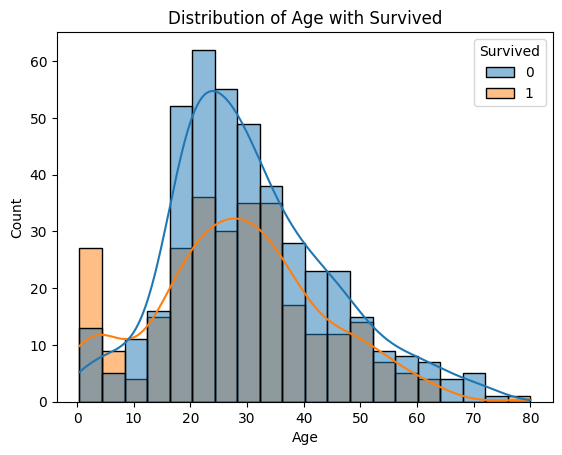

In [31]:
sns.histplot(data=df, x='Age', hue='Survived', kde=True)
plt.title('Distribution of Age with Survived')
plt.show()

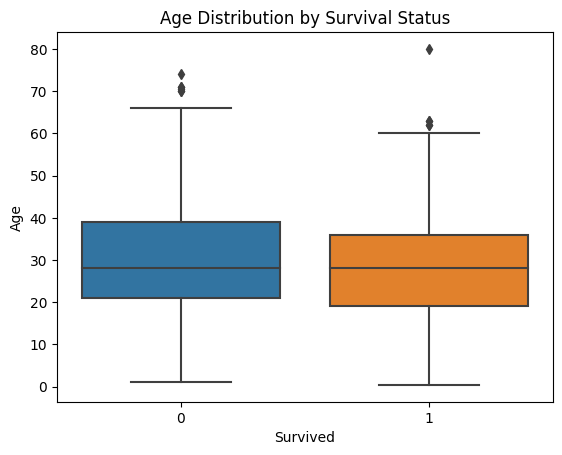

In [32]:
sns.boxplot(data=df, x='Survived', y='Age')
plt.title('Age Distribution by Survival Status')
plt.show()

/tmp/ipykernel_33/30435288.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_survival = df.groupby(['AgeGroup', 'Survived']).size().unstack(fill_value=0)


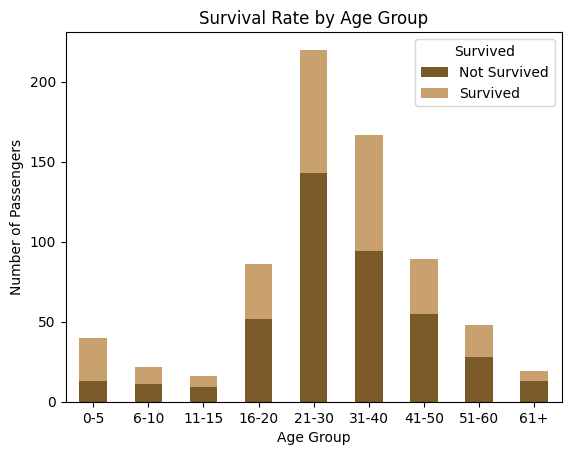

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Memuat dataset Titanic
df = pd.read_csv('/kaggle/input/titanic/train.csv')

# Mengelompokkan usia ke dalam rentang usia
bins = [0, 5, 10, 15, 20, 30, 40, 50, 60, 70]
labels = ['0-5', '6-10', '11-15', '16-20', '21-30', '31-40', '41-50', '51-60', '61+']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Menghitung jumlah penumpang selamat dan tidak selamat berdasarkan rentang usia
age_survival = df.groupby(['AgeGroup', 'Survived']).size().unstack(fill_value=0)

# Visualisasi menggunakan bar plot
age_survival.plot(kind='bar', stacked=True, color=['#7B5A29', '#C9A16E'])
plt.title("Survival Rate by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Number of Passengers")
plt.xticks(rotation=0)
plt.legend(title='Survived', labels=['Not Survived', 'Survived'])
plt.show()

Anak-anak umur di bawah 10 tahun lebih berpeluang selamat, bisa jadi karena diprioritaskan untuk diselamatkan menggunakan sekoci

**Analisis Fare dan Survived**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


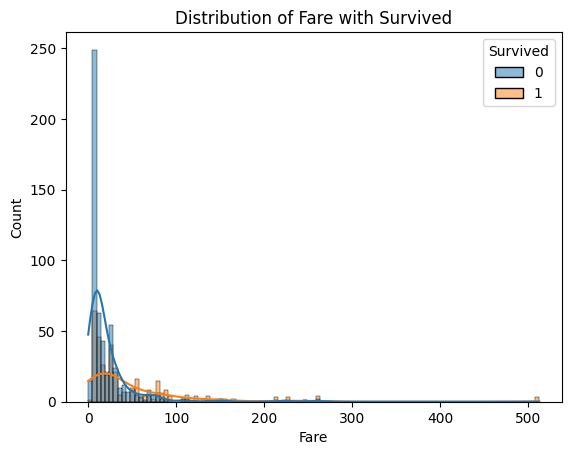

In [34]:
sns.histplot(data=df, x='Fare', hue='Survived', kde=True)
plt.title('Distribution of Fare with Survived')
plt.show()

Penumpang dengan biaya yang lebih tinggi berpeluang selamat dibandingkan yang memiliki biaya rendah

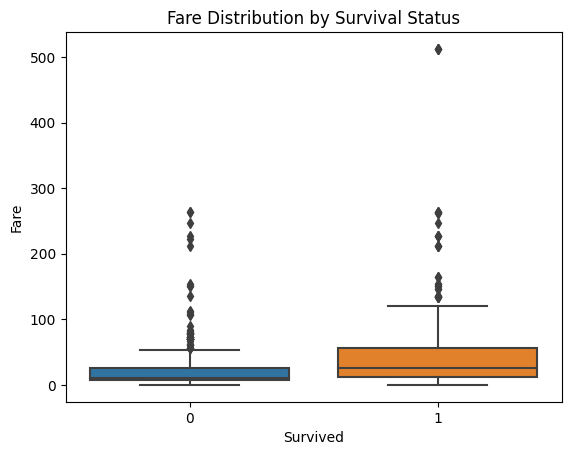

In [35]:
sns.boxplot(data=df, x='Survived', y='Fare')
plt.title('Fare Distribution by Survival Status')
plt.show()

Area Boxplot yang selamat pada kolom Fare lebih tinggi dibandingkan yang tidak selamat

**Analisis Kolom Fare**

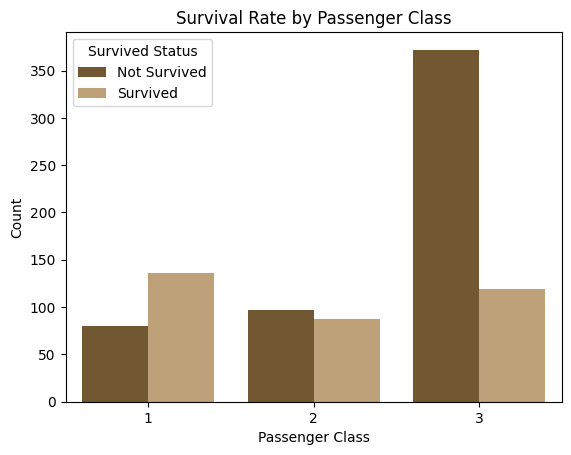

In [36]:
# Count plot for categorical features
sns.countplot(data=df, x='Pclass', hue='Survived', palette={0: '#7B5A29', 1: '#C9A16E'})
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(title='Survived Status', labels=['Not Survived', 'Survived'])
plt.show()

**Data Preprocessing**

Step prepocessing ini berfungsi untuk memperbaiki atau membersihkan data.

Berdasarkan value kosong, terdapat 3 kategori yang terdapat missing value yaitu, umur, cabin, dan embarked.

**Isi data kosong pada Kolom Age dengan Median**

missing value umur diganti dengan median, dengan asumsi tidak mengetahui median. alasan menggunakan median, agar tidak terpengaruhi oleh outliers atau distribusi data yang miring.

In [38]:
df['Age'] = df['Age'].fillna(df['Age'].median())

**Isi data kosong pada Kolom Embarked dengan Modus**

embarked tidak menggunakan median karena ia kategorik (S, N, C) bukan numerik. Jadi embarked menggunakan modus = mode()[0]

In [39]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

**Drop Kolom Cabin karena banyak yang kosong.**

kategori cabin, memiliki banyak missing value sehingga kategori tsb dihapus saja dengan menggunakan fungsi = drop.axis=1 (untuk menghapus kolom) axis=0 (untuk menghapus baris)

In [40]:
df = df.drop('Cabin', axis=1)

**Check hasil setelah di preprocess**

In [41]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
AgeGroup       184
dtype: int64

# Feature Engineering

## Label Encoder untuk mengubah data kategorik menjadi numerik

model machine learning tidak bisa bekerja dengan data teks langsung, jadi kita harus mengubah kategoril (sex, embarked) menjadi numerik.

Label Encoding untuk mengubah data kategorik menjadi numerik

In [74]:
from sklearn.preprocessing import LabelEncoder

In [75]:
#membuat instance LabelEncoder
le = LabelEncoder()

#mengubah kolom 'Sex' menjadi numerik
df['Sex'] = le.fit_transform(df['Sex'])

#mengubah kolom 'Embarked' menjadi numerik
df['Embarked'] = le.fit_transform(df['Embarked'])

In [76]:
#Menampilkan 5 baris pertama untuk melihat perubahan
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2,21-30
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0,31-40
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2,21-30
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,31-40
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2,31-40


## Feature Selection

Feature selection: memilih fitur yang paling relevan untuk digunakan dalam model agar kinerja model lebih baik.

In [48]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = df[features]
y = df['Survived']

In [49]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,2
887,1,0,19.0,0,0,30.0000,2
888,3,0,28.0,1,2,23.4500,2
889,1,1,26.0,0,0,30.0000,0


In [50]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

**Feature Scalling**

Feature scaling: mengubah skala fitur numerik untuk memastikan bahwa semua fitur memiliki bobot yang sama dalam model.

Mengapa hanya fitur 'Age' dan 'Fare' yang perlu di scaling? karena nilai-nilai 'age' dan 'fare' memiliki rentang yang sangat berbeda (misalnya umur bisa bervariasi dari 0 hingga 80 tahun dan tarif bisa bervariasi dari 0 hingga lebih dari 500) sedangkan fitur lainnya adalah kategorik dan hanya memerlukan encoding.

In [51]:
from sklearn.preprocessing import StandardScaler

# Membuat instance StandardScaler
scaler = StandardScaler()

# Melakukan scaling pada fitur numerik
# Hanya 'Age', 'Fare' yang perlu di-scaling
X[['Age', 'Fare']] = scaler.fit_transform(X[['Age', 'Fare']])

# Menampilkan hasil scaling
X.head()

/tmp/ipykernel_33/3045230777.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Age', 'Fare']] = scaler.fit_transform(X[['Age', 'Fare']])


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,-0.565736,1,0,-0.502445,2
1,1,0,0.663861,1,0,0.786845,0
2,3,0,-0.258337,0,0,-0.488854,2
3,1,0,0.433312,1,0,0.420730,2
4,3,1,0.433312,0,0,-0.486337,2


Setelah scaling, kolom 'Age" menunjukkan beberapa banyak deviasi standar yang suatu nilai dari rata-rata, example:

nilai -0.565736 berarti usia penumpang tersebut berada di bawa rata-rata usia dalam dataset. nilai positif 0.663891 menunjukkan usia penumpang tersebut lebih tinggi dari rata-rata demikian juga dengan kolom 'Fare"

**Splitting Data (Membagi Data) Memisahkan data untuk dilatih dan diuji**

Membagi dataset menjadi data pelatihan (training set) dan data pengujian (testing set)

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Data train

In [53]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
331,1,1,1.240235,0,0,-0.074583,2
733,2,1,-0.488887,0,0,-0.386671,2
382,3,1,0.202762,0,0,-0.488854,2
704,3,1,-0.258337,1,0,-0.490280,2
813,3,0,-1.795334,4,2,-0.018709,2
...,...,...,...,...,...,...,...
106,3,0,-0.642586,0,0,-0.494391,2
270,1,1,-0.104637,0,0,-0.024246,2
860,3,1,0.894411,2,0,-0.364355,2
435,1,0,-1.180535,1,2,1.767741,2


In [54]:
y_train

331    0
733    0
382    0
704    0
813    0
      ..
106    1
270    0
860    0
435    1
102    0
Name: Survived, Length: 712, dtype: int64

### Data test

In [55]:
X_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
709,3,1,-0.104637,1,1,-0.341452,0
439,2,1,0.125912,0,0,-0.437007,2
840,3,1,-0.719436,0,0,-0.488854,2
720,2,0,-1.795334,0,1,0.016023,2
39,3,0,-1.180535,1,0,-0.422074,0
...,...,...,...,...,...,...,...
433,3,1,-0.949986,0,0,-0.504962,2
773,3,1,-0.104637,0,0,-0.502949,0
25,3,0,0.663861,1,5,-0.016444,2
84,2,0,-0.949986,0,0,-0.437007,2


In [56]:
y_test

709    1
439    0
840    0
720    1
39     1
      ..
433    0
773    0
25     1
84     1
10     1
Name: Survived, Length: 179, dtype: int64

# Modeling

## Membangun classification model menggunakan Random Forest

In [57]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

- n_estimators menentukan jumlah pohon (trees) yang akan dibuat dalam Random Forest. Ketika kita set n_estimators=100, ini berarti kita akan membuat 100 pohon keputusan (decision trees) yang berbeda. Setiap pohon akan membuat prediksi, dan hasil akhir adalah kombinasi dari semua prediksi pohon tersebut.
- random_state adalah angka yang digunakan untuk mengatur "benih" acak (random seed). Penggunaan random_state memastikan bahwa hasil yang kita dapatkan dari menjalankan model selalu konsisten. Misalnya, setiap kali kita menjalankan kode dengan random_state=42, hasilnya akan sama.

# Evaluation

In [58]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## Prediksi data test menggunakan model random forest yang sudah dibangun

In [59]:
y_pred = model.predict(X_test)

**Evaluation Model Random Forest**

Evaluasi kinerja model menggunakan metrik seperti akurasi, precision, recall, dan F1-Score.

In [60]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

**Prediksi data test menggunakan model random forest yang sudah dibangun**

**Membuat DataFrame Perbandingan**

In [61]:
df_comparison = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})
df_comparison

,Actual,Predicted
709,1,0
439,0,0
840,0,0
720,1,1
39,1,0
...,...,...
433,0,0
773,0,0
25,1,0
84,1,1


Actual: Nilai sebenarnya (label yang benar) untuk setiap sampel
Predicted: Nilai yang diprediksi oleh model
Index menjukkan label atau penanda baris yang terdapat dalam dataframe, ex: index 709 merujuk pada baris ke 709 pada dataframe

## Buat confusion matrix

Menghitung dan mencetak matriks kebingungan yang menunjukkan bagaimana prediksi model dibandingkan dengan label sebenarnya.

In [63]:
# Mencetak confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[91 14]
 [19 55]]
Classification Report
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.81      0.82      0.81       179



True Negative (TN): 92 = model memprediksi tidak selamat (0) dan benar (0)
False Positives (FP): 14 = model memprediksi selamat (1) tetapi sebenarnya tidak selamat (0)
False Negatives (FN): 19 = Model memprediksi tidak selamat (0) tetapi sebenarnya selamat (1)
True Positives (TP): 55 = Model memprediksi selamat (1) dan benar (1)

**Visualisasi Confusion Matrix**

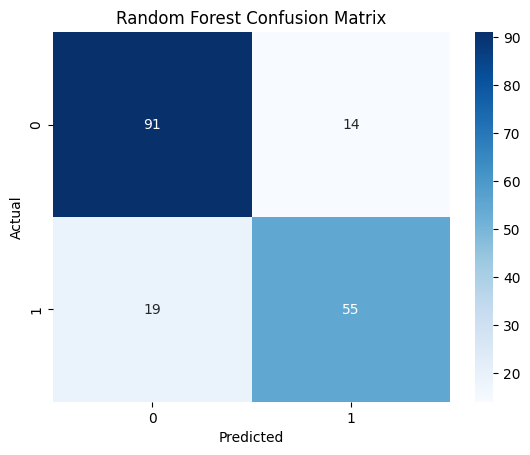

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()

## Menghitung akurasi dari prediksi

In [65]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.82


**Laporan Klasifikasi**

In [67]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.81      0.82      0.81       179



Precision: Proporsi prediksi positif yang benar dari seluruh prediksi positif

kelas 0: 83% prediksi negatif benar
kelas 1: 80% prediksi positif benar
Recall: Proporsi yang benar dari total yang seharusnya positif

kelas 0: 87% dari yang sebenarnya negatif berhasil diprediksi negatif
kelas 1: 74% dari yang sebenarnya positif berhasil diprediksi positif
F1-Score: Harmonik rata-rata dari precision dan recall, yang memberikan gambaran umum dari model. Nilai lebih tinggi berarti model lebih baik.

Support: Jumlah contoh aktual dari setiap kelas dalam datates

kelas 0: 105 contoh
kelas 1: 74 contoh
MacroAvg: avg dari precision, recall, dan F1-score tanpa mempertimbangkan jumlah contoh dalam masing-masing kelas

Weighted Avg: avg dari precision, recall, dan F1-score dengan mempertimbangkan jumlah contoh dalam masing-masing kelas

## Feature importances (khusus random forest)

In [66]:
feature_importance = model.feature_importances_

feature_names = X_train.columns

df_feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
})

df_feature_importance = df_feature_importance.sort_values(by='Importance', ascending=False)
df_feature_importance

,Feature,Importance
1,Sex,0.271410
5,Fare,0.265010
2,Age,0.249995
0,Pclass,0.086957
3,SibSp,0.053685
4,Parch,0.039897
6,Embarked,0.033044


**Support Vector Machine (SVM)**

In [68]:
# Import SVC dari sklearn
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [69]:
# Inisialisasi model SVM
model_svm = SVC(kernel='linear', random_state=42)  # Kita mulai dengan kernel linear

# Melatih model SVM dengan data latih
model_svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [70]:
# Prediksi dengan data uji
y_pred_svm = model_svm.predict(X_test)

In [71]:
# Evaluasi hasil
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm:.2f}")

SVM Accuracy: 0.78


In [72]:
# Confusion matrix & classification report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))
print("Classification Report:")
print(classification_report(y_test, y_pred_svm))

Confusion Matrix:
[[88 17]
 [22 52]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       105
           1       0.75      0.70      0.73        74

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



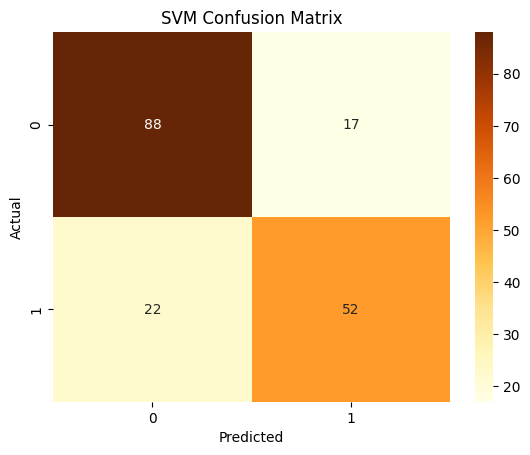

In [73]:
# Visualisasi confusion matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='YlOrBr')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVM Confusion Matrix')
plt.show()